#### Notebook for loading the .mat files


In [ ]:
from glob import glob
import os
import pickle as pkl

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
from scipy.io import loadmat


#plt.style.use('sg_article')
#plt.rcParams.update({"text.usetex": True,})

# set directories
home_dir = os.environ['HOME']
projects_dir = os.environ['Projects']
project_dir = os.path.join(projects_dir, 'MonolayerTransition',)

working_dir = os.path.join(project_dir, 'DataExtraction')
data_dir = os.path.join(project_dir, 'data',)
data_folders = os.listdir(data_dir)


In [7]:
print('Data folders:\n', data_folders)

Data folders:
 ['cn03_islands', 'cytoD_islands', 'high_density_islands', 'low_density_islands']


In [8]:
# select folder (eg high_density_islands) and island number
folder_name = os.listdir(data_dir)[0]
island_num = 5 if folder_name.startswith('cn') else 1
    
data_folder = os.path.join(data_dir, folder_name, f'island{island_num:02d}')

# get all .mat files in the folder
mat_files = glob(os.path.join(data_folder, '*.mat'))


# select the .mat file to load
mat_file = mat_files[0]  # or specify your file path
print(f"Loading .mat file: {mat_file}")

mat_data = loadmat(mat_file)
keys = mat_data.keys()

for key in keys:
    if not key.startswith('__'):
        print(f"  {key}: {mat_data[key].shape}")

try:
    Nx, Ny, Nt = mat_data['u'].shape
    VX = mat_data['u']
    VY = mat_data['v'] 
except:
    Nx, Ny, Nt = mat_data['Sxx'].shape

X = mat_data['x']
Y = mat_data['y']


Loading .mat file: C:\Users\kpr279\Projects\Projects\MonolayerTransition\data\cn03_islands\island05\cell_displacements.mat
  w0: (1, 1)
  d0: (1, 1)
  inc: (1, 1)
  u: (170, 170, 29)
  v: (170, 170, 29)
  c_peak: (170, 170)
  x: (170, 170)
  y: (170, 170)


#### average velocities for cn03_island05

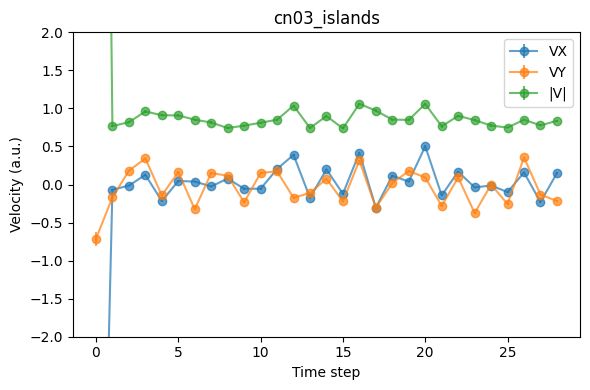

In [9]:
# plot average and sem over time
VX_av = VX.mean(axis=(0,1))
VX_sem = VX.std(axis=(0,1)) / np.sqrt(Nx*Ny)
VY_av = VY.mean(axis=(0,1))
VY_sem = VY.std(axis=(0,1)) / np.sqrt(Nx*Ny)
V_av = np.sqrt((VX**2 + VY**2)).mean(axis=(0,1))
V_sem = np.sqrt((VX**2 + VY**2)).std(axis=(0,1)) / np.sqrt(Nx*Ny)

fig, ax = plt.subplots(figsize=(6,4))
ax.errorbar(np.arange(Nt), VX_av, yerr=VX_sem, marker='o', label='VX', alpha=0.7)
ax.errorbar(np.arange(Nt), VY_av, yerr=VY_sem, marker='o', label='VY', alpha=0.7)
ax.errorbar(np.arange(Nt), V_av, yerr=V_sem, marker='o', label='|V|', alpha=0.7)
ax.set_xlabel('Time step')
ax.set_ylabel('Velocity (a.u.)')
ax.set_ylim(-2,2)
ax.legend()
ax.set_title(f'{folder_name}')
plt.tight_layout()

#### average velocities for cytoD_island01

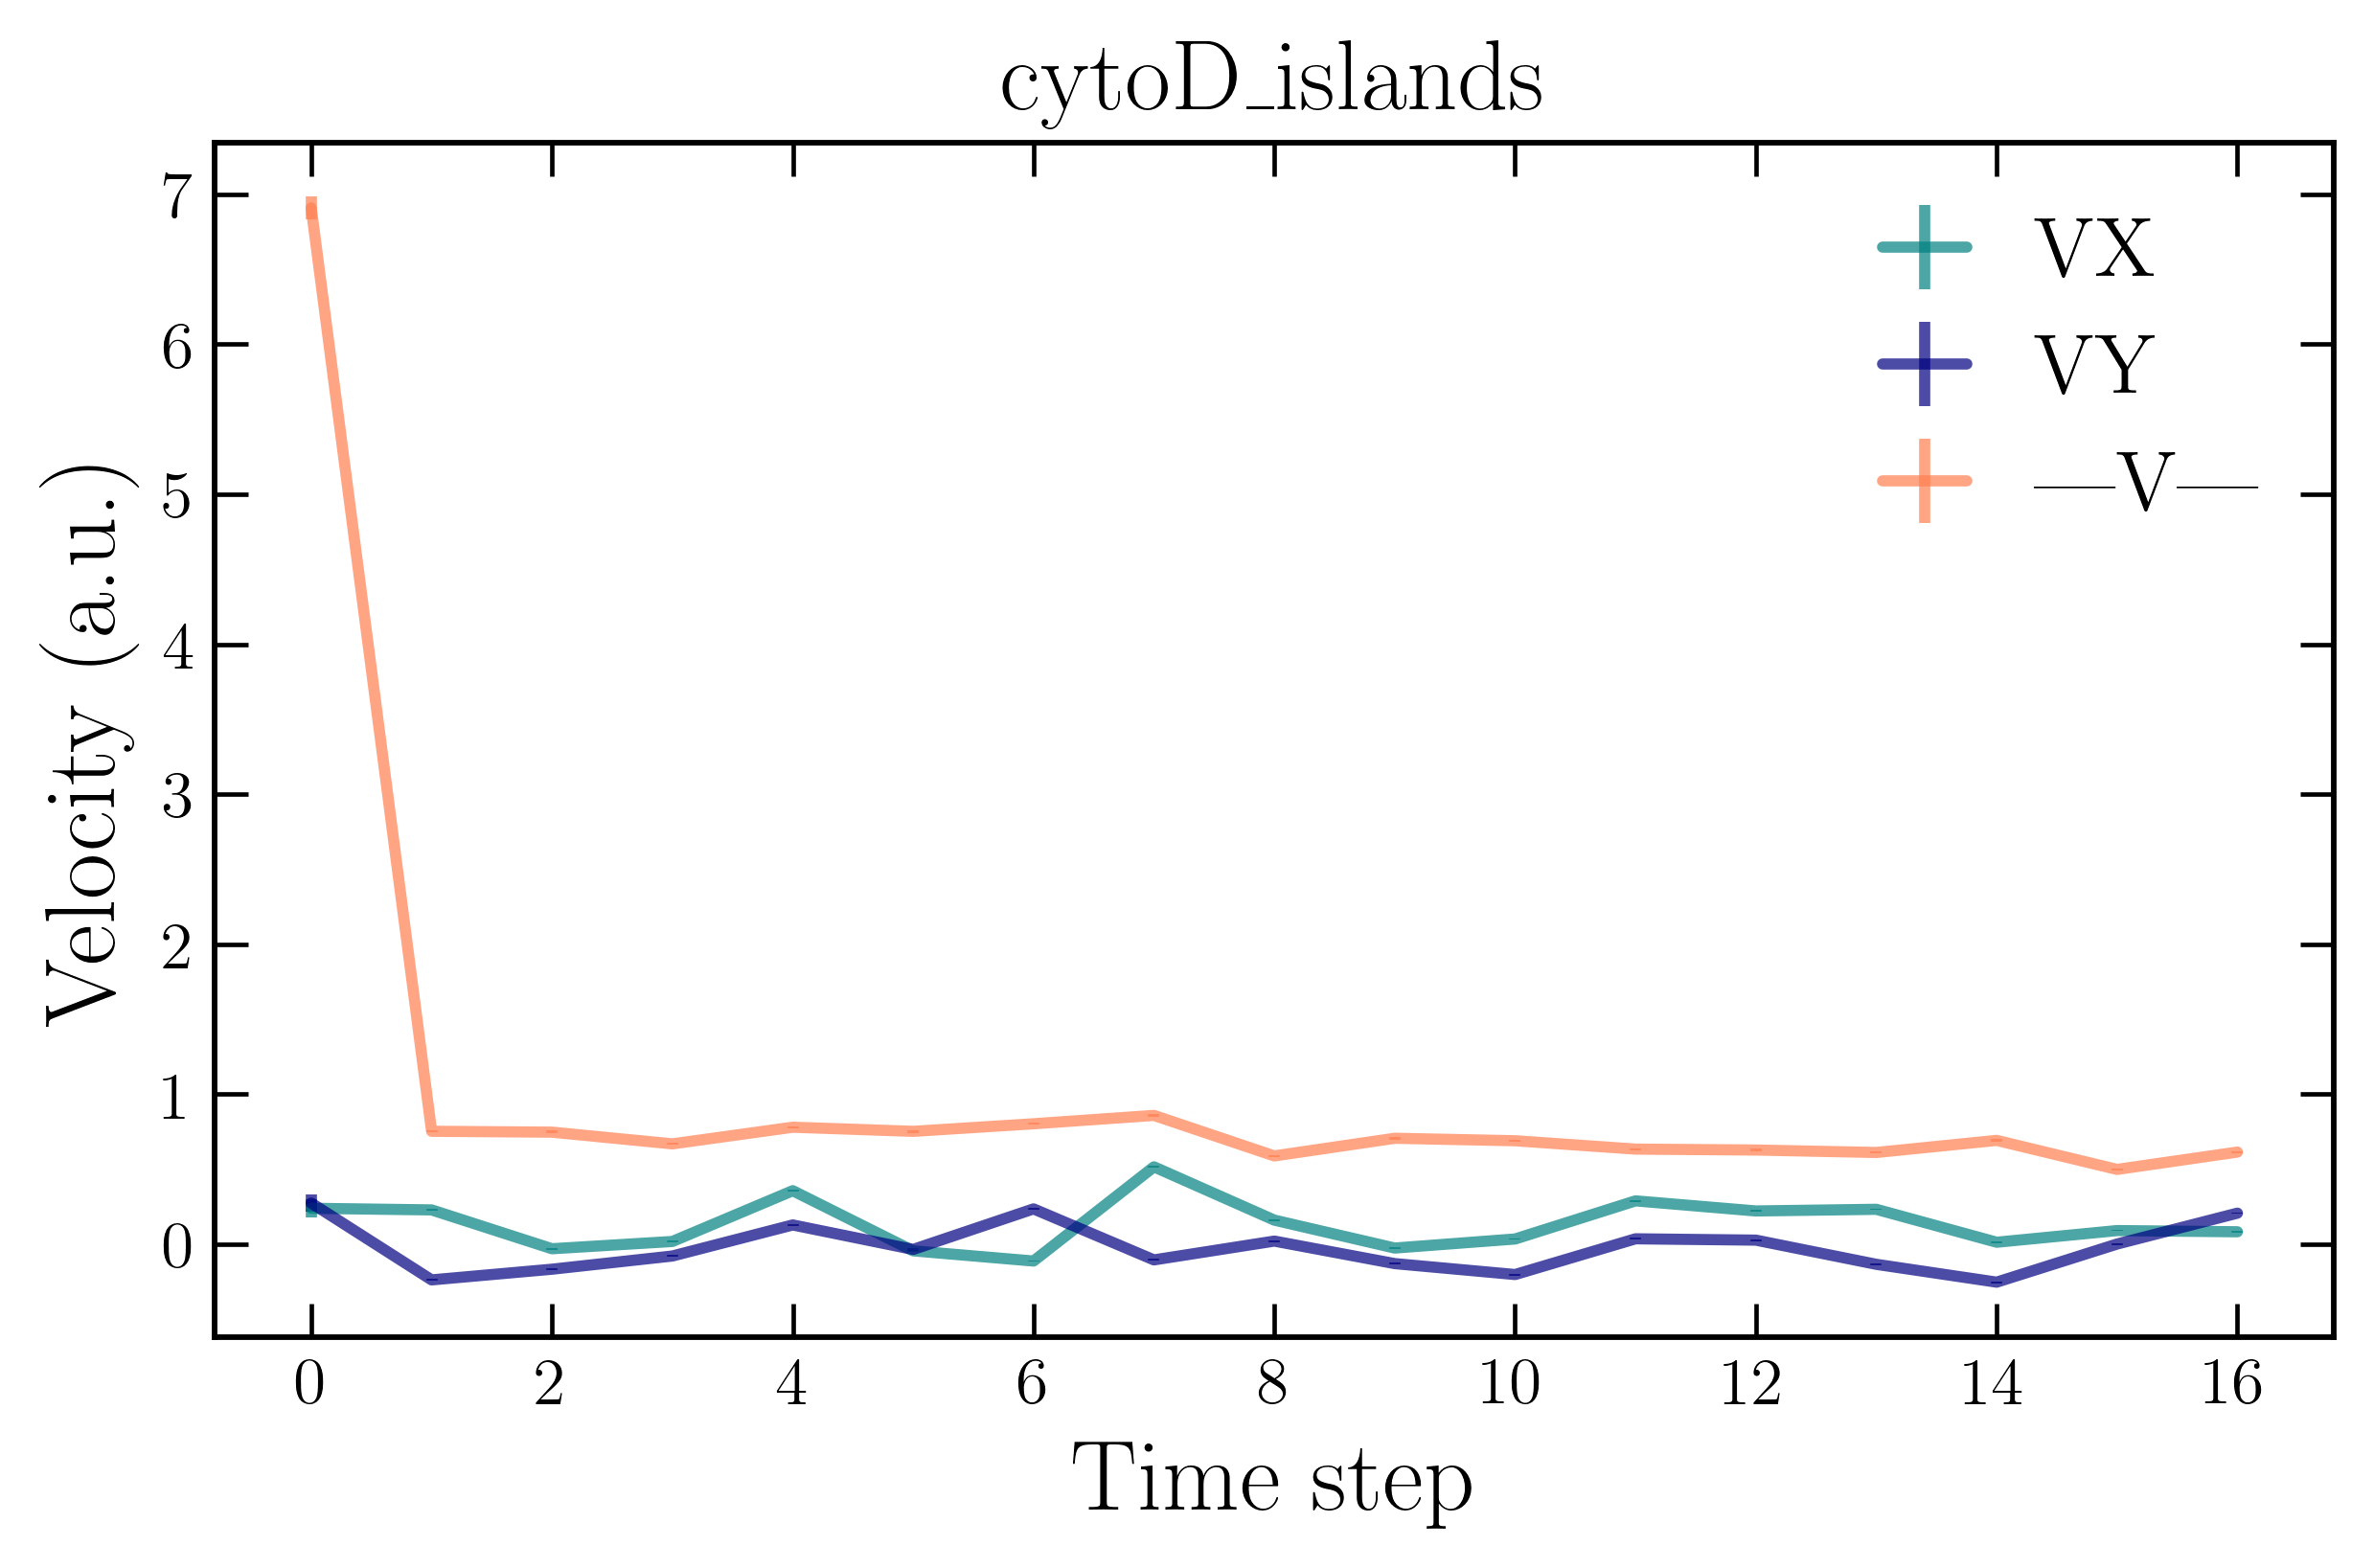

In [108]:
# plot average and sem over time
VX_av = VX.mean(axis=(0,1))
VX_sem = VX.std(axis=(0,1)) / np.sqrt(Nx*Ny)
VY_av = VY.mean(axis=(0,1))
VY_sem = VY.std(axis=(0,1)) / np.sqrt(Nx*Ny)
V_av = np.sqrt((VX**2 + VY**2)).mean(axis=(0,1))
V_sem = np.sqrt((VX**2 + VY**2)).std(axis=(0,1)) / np.sqrt(Nx*Ny)

fig, ax = plt.subplots(figsize=(6,4))
ax.errorbar(np.arange(Nt), VX_av, yerr=VX_sem, label='VX', alpha=0.7)
ax.errorbar(np.arange(Nt), VY_av, yerr=VY_sem, label='VY', alpha=0.7)
ax.errorbar(np.arange(Nt), V_av, yerr=V_sem, label='|V|', alpha=0.7)
ax.set_xlabel('Time step')
ax.set_ylabel('Velocity (a.u.)')
ax.legend()
ax.set_title(f'{folder_name}')
plt.tight_layout()

#### average velocities for high_density_island01

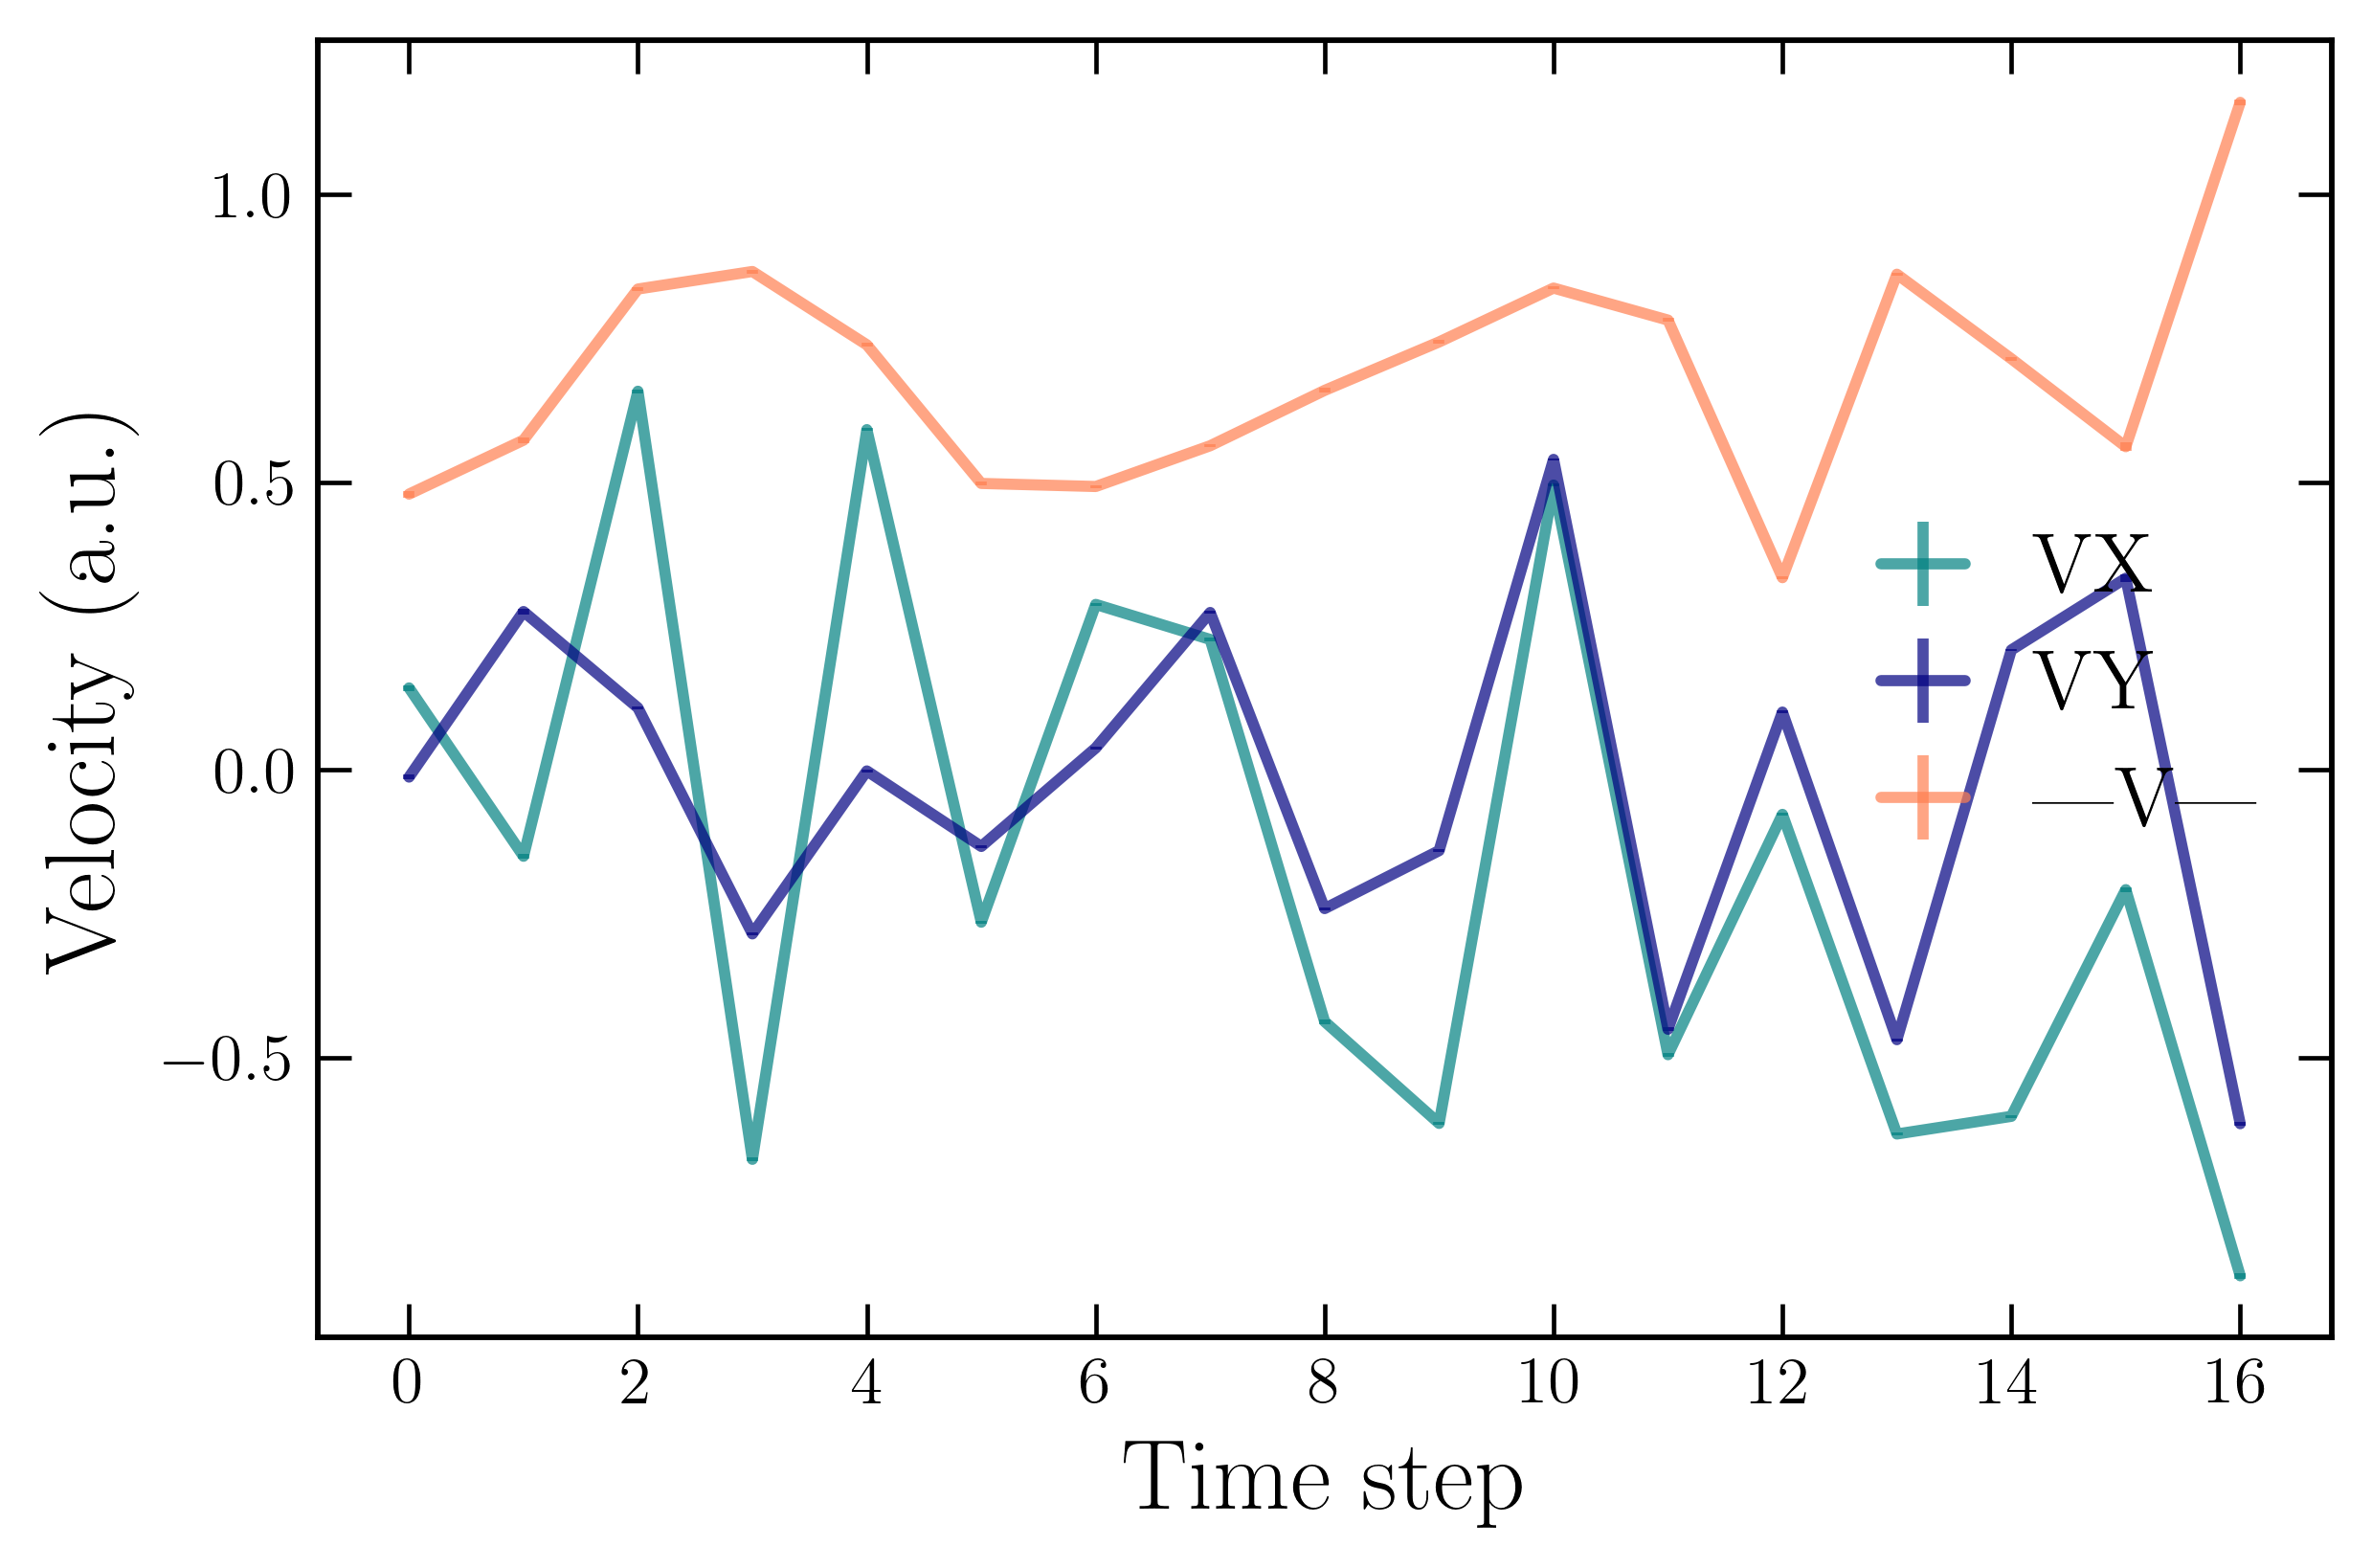

In [ ]:
## high-density

# plot average and sem over time
VX_av = VX.mean(axis=(0,1))
VX_sem = VX.std(axis=(0,1)) / np.sqrt(Nx*Ny)
VY_av = VY.mean(axis=(0,1))
VY_sem = VY.std(axis=(0,1)) / np.sqrt(Nx*Ny)
V_av = np.sqrt((VX**2 + VY**2)).mean(axis=(0,1))
V_sem = np.sqrt((VX**2 + VY**2)).std(axis=(0,1)) / np.sqrt(Nx*Ny)

fig, ax = plt.subplots(figsize=(6,4))
ax.errorbar(np.arange(Nt), VX_av, yerr=VX_sem, label='VX', alpha=0.7)
ax.errorbar(np.arange(Nt), VY_av, yerr=VY_sem, label='VY', alpha=0.7)
ax.errorbar(np.arange(Nt), V_av, yerr=V_sem, label='|V|', alpha=0.7)
ax.set_xlabel('Time step')
ax.set_ylabel('Velocity (a.u.)')
ax.legend()
plt.tight_layout()

#### average velocities for low_density_island01

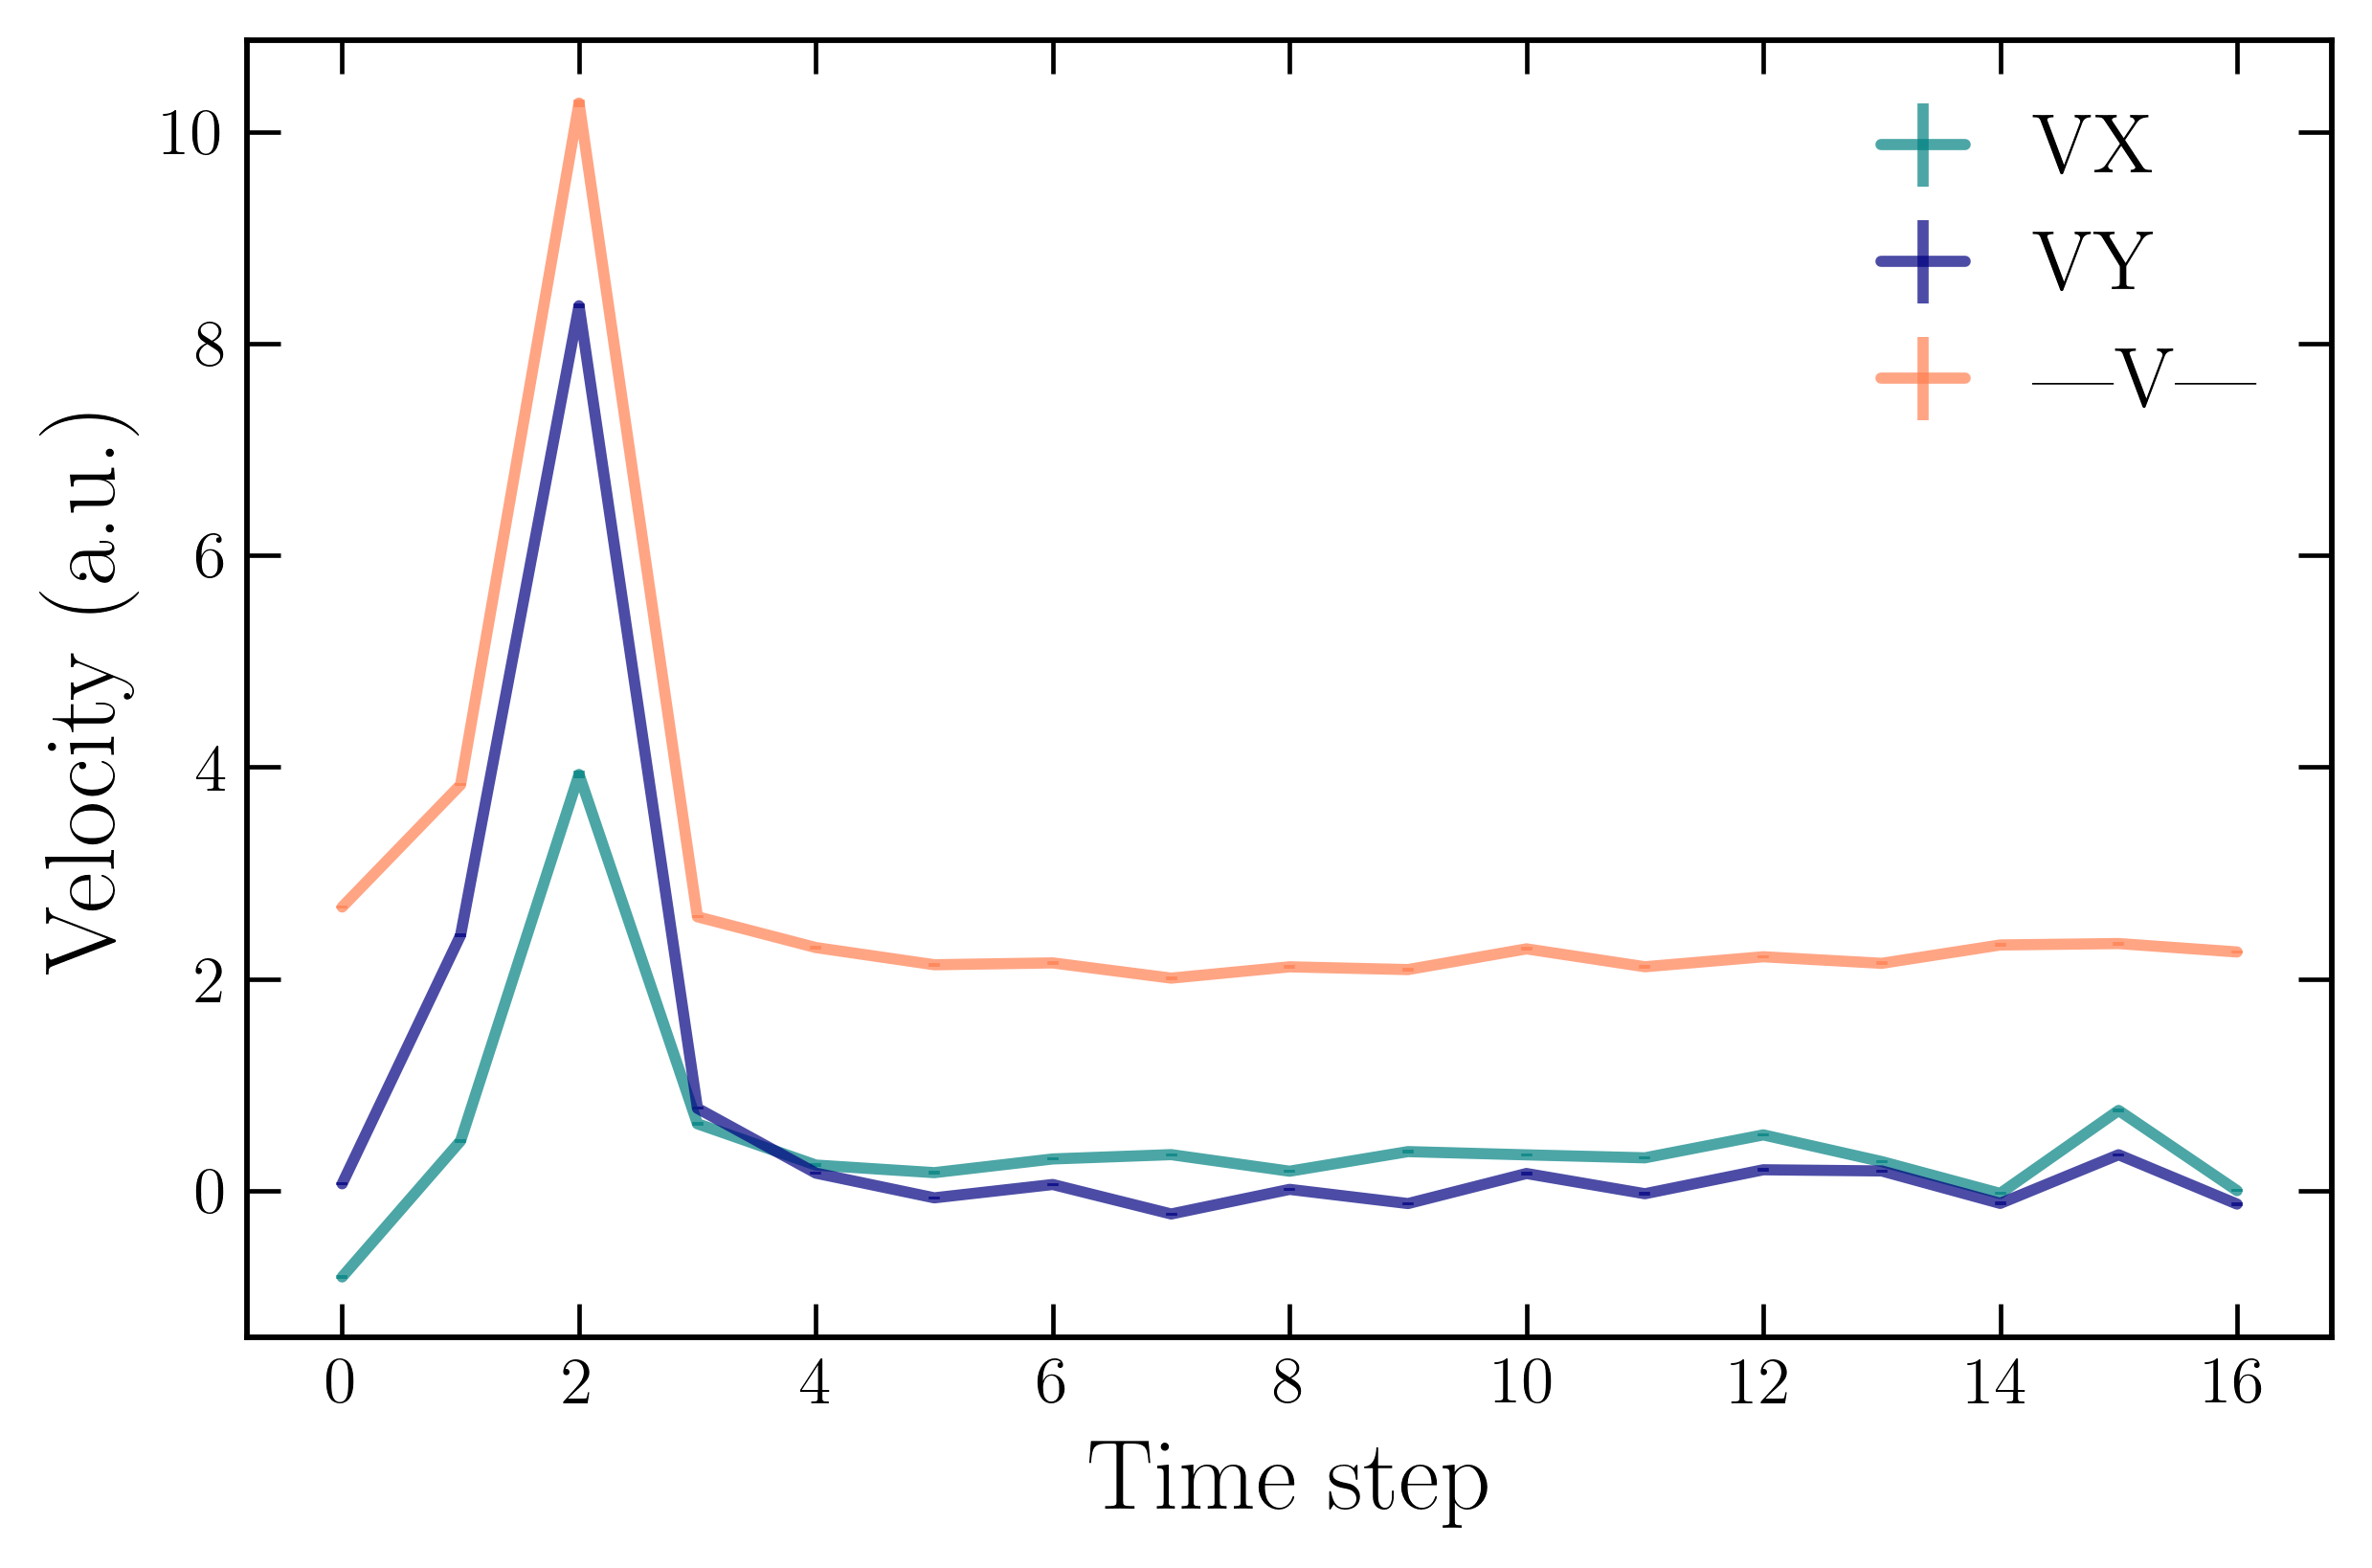

In [ ]:


# plot average and sem over time
VX_av = VX.mean(axis=(0,1))
VX_sem = VX.std(axis=(0,1)) / np.sqrt(Nx*Ny)
VY_av = VY.mean(axis=(0,1))
VY_sem = VY.std(axis=(0,1)) / np.sqrt(Nx*Ny)
V_av = np.sqrt((VX**2 + VY**2)).mean(axis=(0,1))
V_sem = np.sqrt((VX**2 + VY**2)).std(axis=(0,1)) / np.sqrt(Nx*Ny)

fig, ax = plt.subplots(figsize=(6,4))
ax.errorbar(np.arange(Nt), VX_av, yerr=VX_sem, label='VX', alpha=0.7)
ax.errorbar(np.arange(Nt), VY_av, yerr=VY_sem, label='VY', alpha=0.7)
ax.errorbar(np.arange(Nt), V_av, yerr=V_sem, label='|V|', alpha=0.7)
ax.set_xlabel('Time step')
ax.set_ylabel('Velocity (a.u.)')
ax.legend()
plt.tight_layout()